In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
#There are 8124 rows and 23 columns in the dataset

In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
#There are no null value in the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
#all the columns are object in data type which means categorical in nature.

In [9]:
df['class'].unique()

array(['p', 'e'], dtype=object)

Two types of mushroom poisonous and edible.

In [10]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

# EDA

# Univariate analysis

<AxesSubplot:xlabel='class', ylabel='count'>

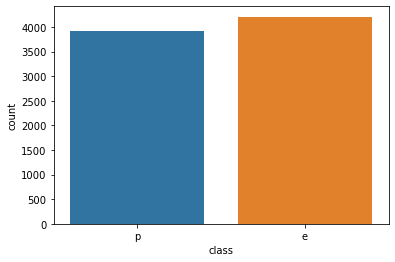

In [11]:
sn.countplot(df["class"])

Edible Mushroom are more than the Poisonous Mushroom.The data is evenly distributed in the traget column.

In [12]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [13]:
feature=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']


In [14]:
list(enumerate(feature))

[(0, 'cap-shape'),
 (1, 'cap-surface'),
 (2, 'cap-color'),
 (3, 'bruises'),
 (4, 'odor'),
 (5, 'gill-attachment'),
 (6, 'gill-spacing'),
 (7, 'gill-size'),
 (8, 'gill-color'),
 (9, 'stalk-shape'),
 (10, 'stalk-root'),
 (11, 'stalk-surface-above-ring'),
 (12, 'stalk-surface-below-ring'),
 (13, 'stalk-color-above-ring'),
 (14, 'stalk-color-below-ring'),
 (15, 'veil-type'),
 (16, 'veil-color'),
 (17, 'ring-number'),
 (18, 'ring-type'),
 (19, 'spore-print-color'),
 (20, 'population'),
 (21, 'habitat')]

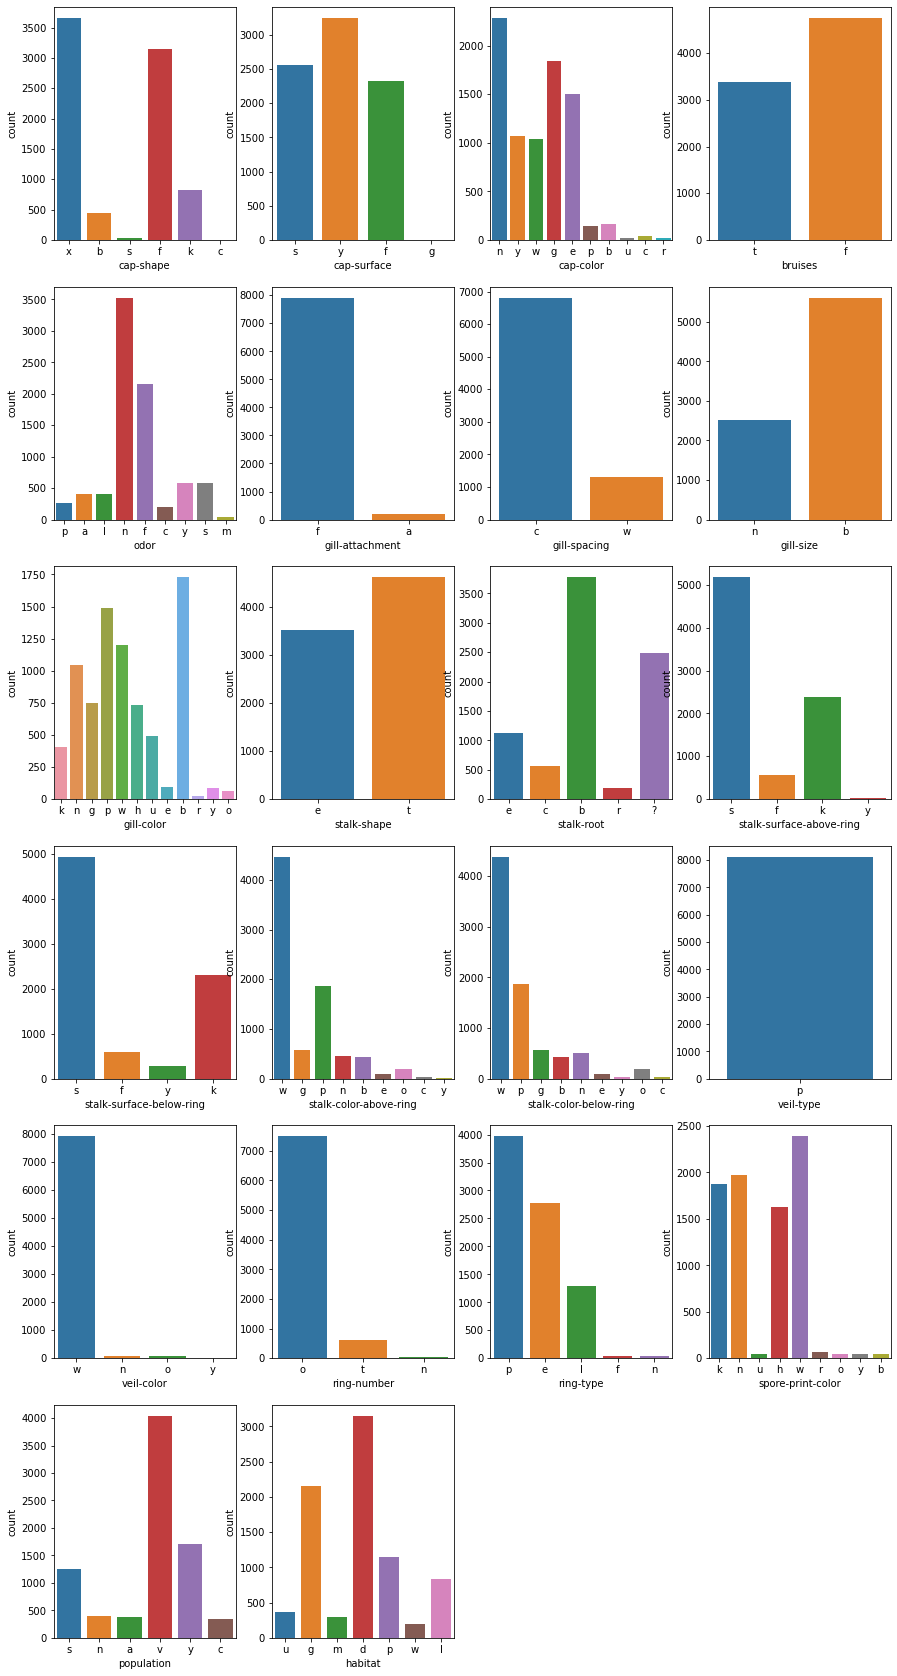

In [15]:
#Plotting Graph
plt.figure(figsize=(15,30))
for i in enumerate(feature):
    plt.subplot(6,4,i[0]+1)
    sn.countplot(i[1], data=df)

In [16]:
#veil-type has no other variable it wont add anything to the model.so we can drop that data.

# bivariate analysis

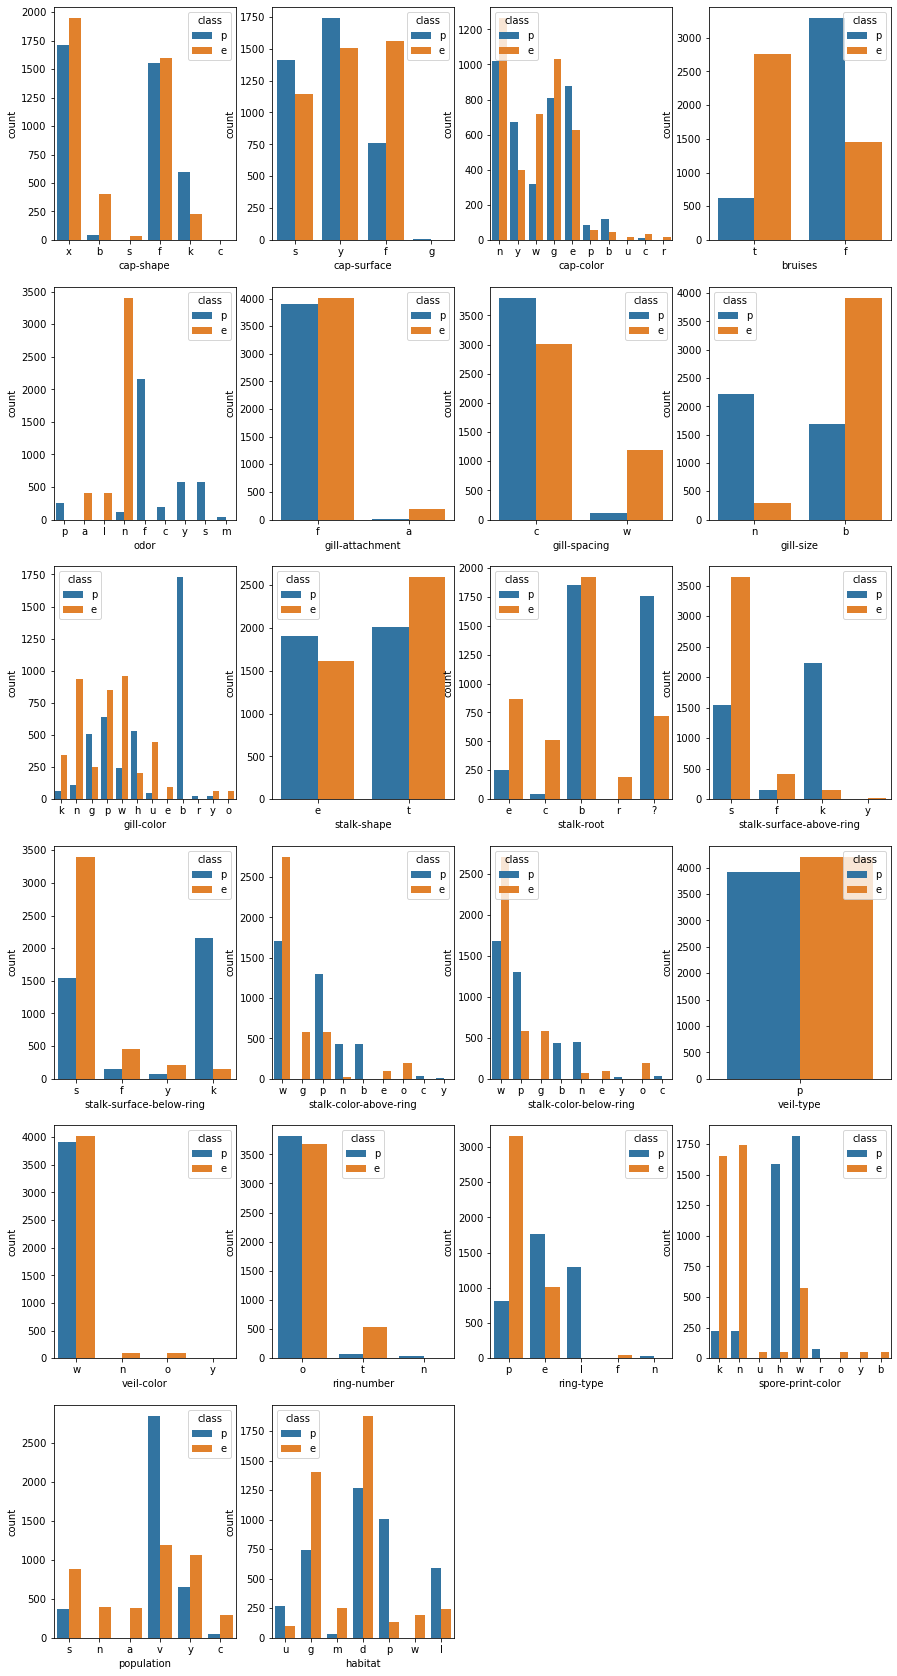

In [17]:
# plotting graph of all features with class
plt.figure(figsize=(15,30))
for i in enumerate(feature):
    plt.subplot(6,4,i[0]+1)
    sn.countplot(i[1],hue="class", data=df)

<AxesSubplot:title={'center':'comparison between odor and class'}, xlabel='odor', ylabel='class'>

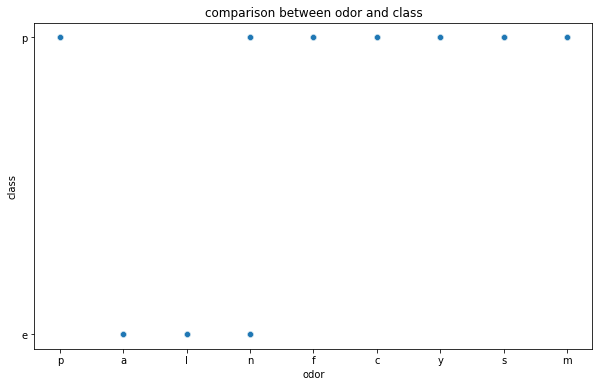

In [18]:
plt.figure(figsize=[10,6])
plt.title("comparison between odor and class")
sn.scatterplot(df["odor"],df["class"])

The graph shows how odor almond=a,anise=l,none=n are highly relatable to eidble class while rest are with poisonous

# Converting All the columns to numeric using Label Encoder as all the columns content categorical data

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
d1=df.apply(LabelEncoder().fit_transform)

In [21]:
d1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [22]:
#droping veil_type
d1.drop("veil-type",axis=1,inplace=True)

In [23]:
d1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


# Checking for Coorelation

<AxesSubplot:>

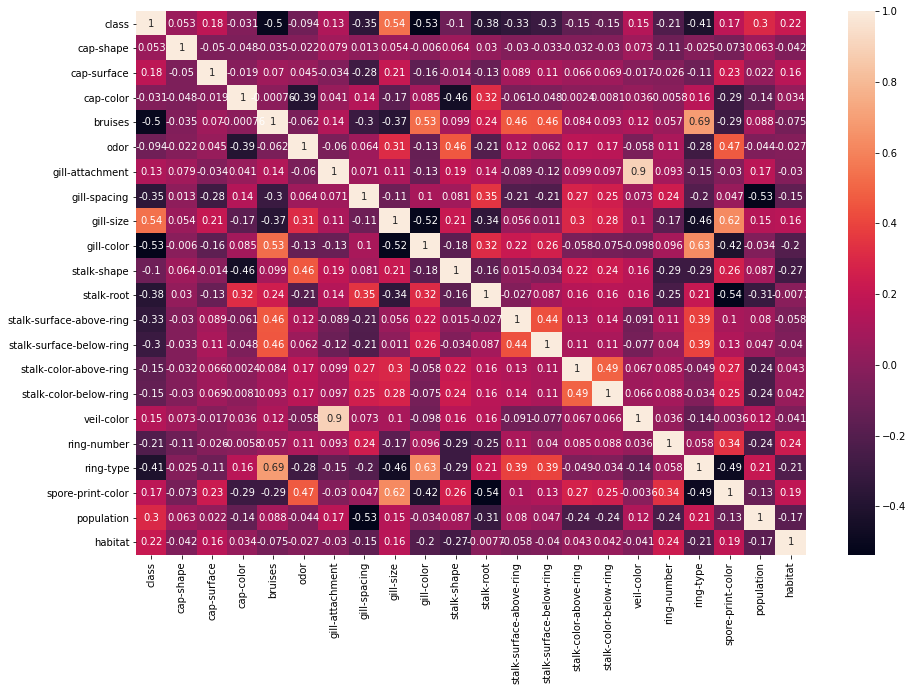

In [25]:
plt.figure(figsize=(15,10))
sn.heatmap(d1.corr(),annot=True)

# Splitting the data

In [26]:
x=d1.drop("class",axis=1)

In [27]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


In [28]:
y=d1["class"]

In [29]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [30]:
#checking the shape
x.shape,y.shape

((8124, 21), (8124,))

In [31]:
y= y.values.reshape(-1,1)

In [32]:
y.shape

(8124, 1)

# Importing liabraries

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

# Model Building

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=55)

In [35]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5443, 21), (2681, 21), (5443, 1), (2681, 1))

In [36]:
def model(name):
    name.fit(x_train,y_train)
    pred=name.predict(x_test)
    print("Accuracy score: ", accuracy_score(y_test,pred))
    print("Classification report: ", classification_report(y_test,pred))
    print("Confusion_matrics: ", confusion_matrix(y_test,pred))

In [37]:
#RandomForestClassifier
model(RandomForestClassifier())

Accuracy score:  1.0
Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1381
           1       1.00      1.00      1.00      1300

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681

Confusion_matrics:  [[1381    0]
 [   0 1300]]


In [38]:
#DecisionTreeClassifier
model(DecisionTreeClassifier())

Accuracy score:  1.0
Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1381
           1       1.00      1.00      1.00      1300

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681

Confusion_matrics:  [[1381    0]
 [   0 1300]]


In [39]:
#SVC
model(SVC())

Accuracy score:  0.990302126072361
Classification report:                precision    recall  f1-score   support

           0       0.98      1.00      0.99      1381
           1       1.00      0.98      0.99      1300

    accuracy                           0.99      2681
   macro avg       0.99      0.99      0.99      2681
weighted avg       0.99      0.99      0.99      2681

Confusion_matrics:  [[1380    1]
 [  25 1275]]


In [40]:
#cross_validation for all the Model

In [41]:
#RandomForestClassifier
print(cross_val_score(RandomForestClassifier(),x,y,cv=5).mean())

0.9021129973474802


In [42]:
#DecisionTreeClassifier
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean())

0.9143002652519894


In [43]:
#SVC
print(cross_val_score(SVC(),x,y,cv=5).mean())

0.8420306934444864


The differance between the score of model and cross calidation is least in DecisionTreeClassifier. 
DecisionTreeClassifier is the best model.

# Checking for hyper parameters for DecisionTreeClassifer using GridSearchCV

In [44]:
parameter={"max_depth": np.arange(2,10),
          "criterion":["gini","entropy"]}

In [45]:
gsc=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [46]:
gsc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [47]:
gsc.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [48]:
# Building the final model with best parameters
best_model=DecisionTreeClassifier(criterion="gini",max_depth=7)
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy score: ", accuracy_score(y_test,pred))
print("Classification report: ", classification_report(y_test,pred))
print("Confusion_matrics: ", confusion_matrix(y_test,pred))

Accuracy score:  1.0
Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1381
           1       1.00      1.00      1.00      1300

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681

Confusion_matrics:  [[1381    0]
 [   0 1300]]


# Saving the Model

In [52]:
import joblib
joblib.dump(best_model,"Mushroom_project.pkl")

['Mushroom_project.pkl']